In [204]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import model_selection
from keras import models,layers
import seaborn as sns
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import LSTM,Dropout,Dense



In [205]:
df=pd.read_csv('./피쳐값늘려준것.csv')
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)
df

,외국인순매수,전월대비 등락률,label_category,dummy_down,dummy_up,updown_label,외국인순매수updown,년도_2005,년도_2006,년도_2007,...,월_03,월_04,월_05,월_06,월_07,월_08,월_09,월_10,월_11,월_12
0,8538,0.041053,0.0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14654,0.084336,0.0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-20741,-0.045167,0.0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,-3243,-0.056313,0.0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1048,0.064644,0.0,1,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,15250,0.048834,1.0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
204,-389,-0.105556,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,-6207,0.013457,1.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,-23373,0.021662,1.0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [206]:
X_features=df.columns
X_features

Index(['외국인순매수', '전월대비 등락률', 'label_category', 'dummy_down', 'dummy_up',
       'updown_label', '외국인순매수updown', '년도_2005 ', '년도_2006 ', '년도_2007 ',
       '년도_2008 ', '년도_2009 ', '년도_2010 ', '년도_2011 ', '년도_2012 ', '년도_2013 ',
       '년도_2014 ', '년도_2015 ', '년도_2016 ', '년도_2017 ', '년도_2018 ', '년도_2019 ',
       '년도_2020 ', '년도_2021 ', '년도_2022 ', '월_01', '월_02', '월_03', '월_04',
       '월_05', '월_06', '월_07', '월_08', '월_09', '월_10', '월_11', '월_12'],
      dtype='object')

In [227]:
X_data=df.drop(['updown_label','label_category','외국인순매수'], axis = 1)
y_data = df['전월대비 등락률']

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.3, random_state=156)


In [281]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))



In [288]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
y_df = df['updown_label']
X_df= df.drop(['전월대비 등락률','updown_label'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[15  6]
 [ 9 12]]
정확도: 0.6429, 정밀도: 0.6667, 재현율: 0.5714


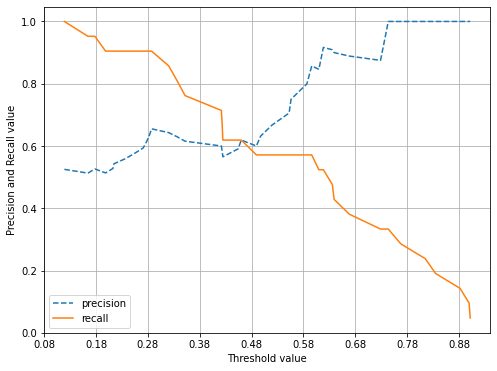

In [289]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [290]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [459]:
df_prac=pd.read_csv('./외국인순매수전월대비등락률경기국면레이블화등락률레이블화.csv')
# df_prac['date']=pd.to_datetime(df_prac['date'])
df_prac.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)
df_prac['날짜']=pd.to_datetime(df_prac['날짜'])
df_prac['전월대비 등락률']=df_prac['전월대비 등락률']*100
df_prac.drop(['label_category','dummy_down','dummy_up','updown_label'],axis=1,inplace=True)

In [374]:
mydata = df_prac[["외국인순매수", "전월대비 등락률"]]
mydata.set_index(df_prac['날짜'],inplace=True)
mydata_1=mydata.loc["2016-01-01":"2019-04-01"]
len(mydata_1)
mydata_1

,외국인순매수,전월대비 등락률
날짜,,
2016-01-01,-29668,-2.511077
2016-02-01,2651,0.240577
2016-03-01,20323,4.131663
2016-04-01,19570,-0.085174
2016-05-01,1798,-0.539077
2016-06-01,7893,-0.657964
2016-07-01,33975,2.326489
2016-08-01,10792,0.915592
2016-09-01,10816,0.441353


In [402]:
mydata_1.dtypes

dtype('O')

In [492]:
df_prac['Year'] = df_prac['날짜'].dt.year
df_prac['Month'] = df_prac['날짜'].dt.month
df_prac['Day'] = df_prac['날짜'].dt.day
df_prac_1=df_prac.loc[(df_prac['날짜']>="2016-01-01") & (df_prac['날짜']<="2019-04-01")]
df_prac_1

,날짜,외국인순매수,전월대비 등락률,Year,Month,Day,2달,3달,5달
132,2016-01-01,-29668,-2.511077,2016,1,1,-1.693474,0.003066,-0.652062
133,2016-02-01,2651,0.240577,2016,2,1,-2.025126,-1.966008,-0.280750
134,2016-03-01,20323,4.131663,2016,3,1,-1.135250,-1.269892,-0.452260
135,2016-04-01,19570,-0.085174,2016,4,1,2.186120,0.620388,-0.305157
136,2016-05-01,1798,-0.539077,2016,5,1,2.023245,1.429022,0.047363
137,2016-06-01,7893,-0.657964,2016,6,1,-0.312126,1.169137,0.247383
138,2016-07-01,33975,2.326489,2016,7,1,-0.598520,-0.427405,0.618005
139,2016-08-01,10792,0.915592,2016,8,1,0.834262,0.376483,1.035187
140,2016-09-01,10816,0.441353,2016,9,1,1.621040,0.861372,0.391973
141,2016-10-01,3986,-1.734172,2016,10,1,0.678473,1.227811,0.497279


<AxesSubplot:xlabel='외국인순매수', ylabel='전월대비 등락률'>

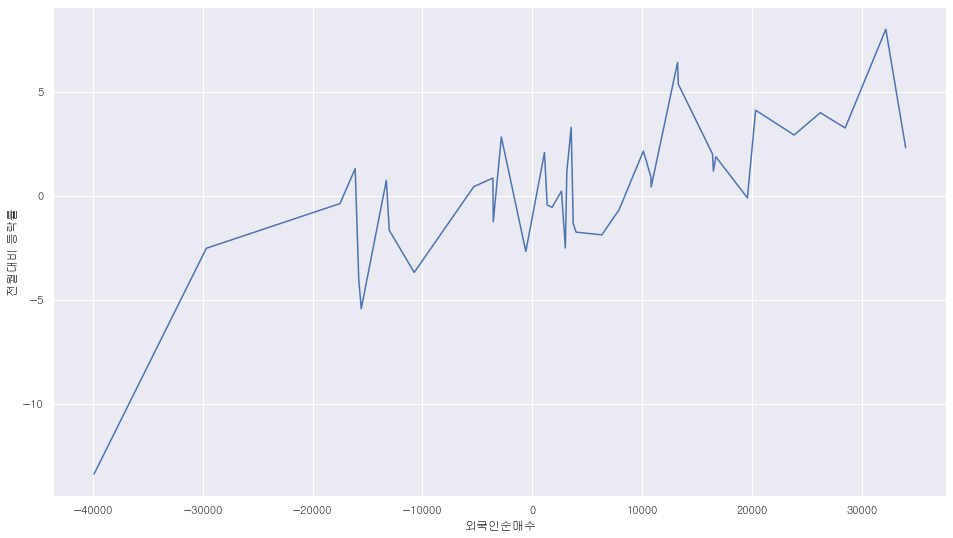

In [493]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df_prac_1['전월대비 등락률'], x=df_prac_1['외국인순매수'])


In [494]:
from scalecast.Forecaster import Forecaster
import matplotlib.pyplot as plt
import pandas_datareader as dpr

<AxesSubplot:xlabel='Date', ylabel='Values'>

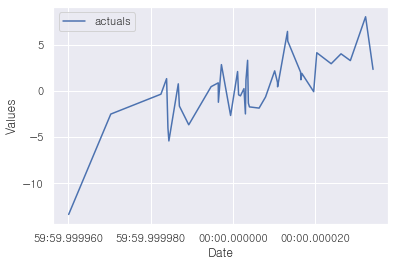

In [495]:
f=Forecaster(y=df_prac_1['전월대비 등락률'],current_dates=df_prac_1['외국인순매수'])
f.plot()

In [500]:
df_prac_1["2달"]=df_prac_1[["전월대비 등락률"]].rolling(2).mean().shift(1)
df_prac_1['2달']
df_prac_1["3달"]=df_prac_1[["전월대비 등락률"]].rolling(3).mean().shift(1)
df_prac_1['3달']
df_prac_1["5달"]=df_prac_1[["전월대비 등락률"]].rolling(5).mean().shift(1)
df_prac_1['5달']

132         NaN
133         NaN
134         NaN
135         NaN
136         NaN
137    0.247383
138    0.618005
139    1.035187
140    0.391973
141    0.497279
142    0.258260
143    0.143760
144    0.111842
145    0.334457
146    0.479018
147    1.481703
148    2.146361
149    3.000162
150    2.972809
151    2.831289
152    1.846477
153    1.692638
154    1.482606
155    0.731242
156    0.568212
157    1.699365
158    0.350656
159   -0.574146
160    0.367390
161   -0.295332
162   -1.897191
163   -1.078627
164   -0.990305
165   -1.385020
166   -3.325533
167   -1.863989
168   -2.130986
169   -0.766493
170   -1.025689
171    1.150321
Name: 5달, dtype: float64

In [501]:
df_prac_diff= df_prac_1.diff().dropna()

Text(0, 0.5, 'price')

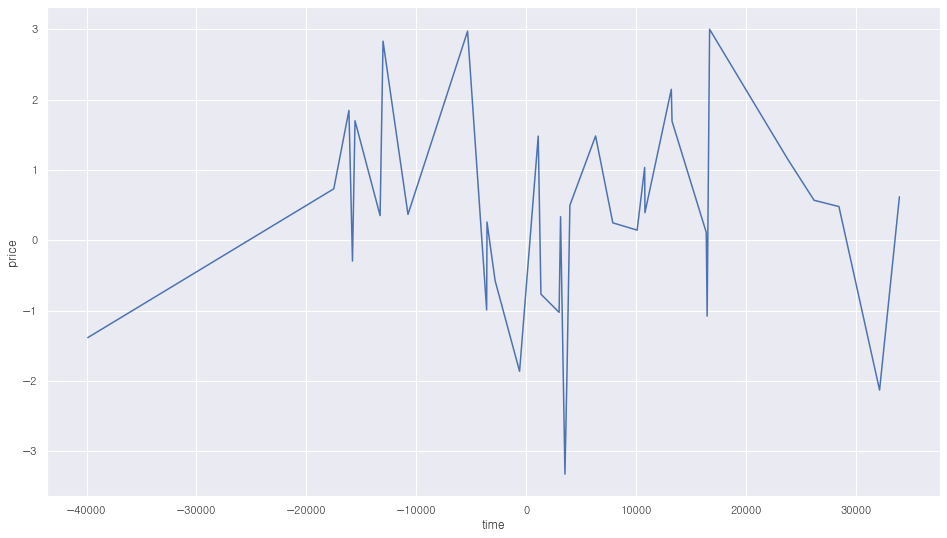

In [502]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df_prac_1['5달'], x=df_prac_1['외국인순매수'])
plt.xlabel('time')
plt.ylabel('price')

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

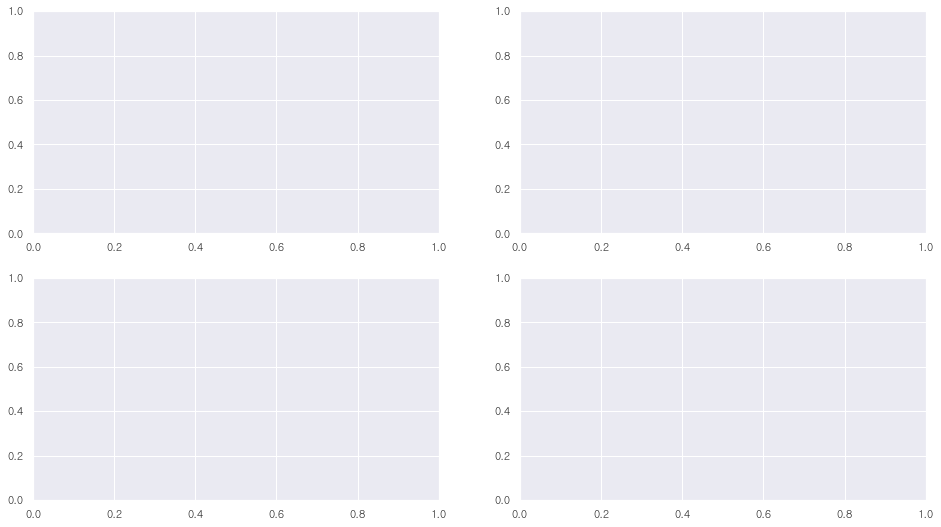

In [503]:
time_steps = [['2006', '2008'],
            ['2008', '2010'], 
              ['2016', '2019'], 
              ['2010', '2017'], 
              ['2020', '2021']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = df_prac.loc[(df_prac_1['날짜'] > time_steps[i][0]) & (df_prac_1['날짜'] < time_steps[i][1])]
    sns.lineplot(y=df_prac_1["전월대비 등락률"], x=df_prac_1['날짜'], ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [505]:
from sklearn.model_selection import train_test_split

In [506]:
x_train, x_test, y_train, y_test = train_test_split(df_prac_1.drop('전월대비 등락률', 1), df_prac_1['전월대비 등락률'], test_size=0.3, random_state=0, shuffle=False)

In [507]:
import tensorflow as tf

In [508]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [509]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [510]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [511]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (8, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (8, 1)


In [512]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [513]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [515]:
model.compile(optimizer, loss)

In [516]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
      1/Unknown - 1s 1s/step - loss: 2.3324WARNING:tensorflow:Can save best model only with val_loss available, skipping.
1/1 [==============================] - 2s 2s/step - loss: 2.3324
Epoch 2/50
1/1 [==============================] - 0s 44ms/step - loss: 2.3177
Epoch 3/50
1/1 [==============================] - 0s 43ms/step - loss: 2.3022
Epoch 4/50
1/1 [==============================] - 0s 45ms/step - loss: 2.2878
Epoch 5/50
1/1 [==============================] - 0s 44ms/step - loss: 2.2763
Epoch 6/50
1/1 [==============================] - 0s 47ms/step - loss: 2.2662
Epoch 7/50
1/1 [==============================] - 0s 42ms/step - loss: 2.2580
Epoch 8/50
1/1 [==============================] - 0s 44ms/step - loss: 2.2526
Epoch 9/50
1/1 [==============================] - 0s 48ms/step - loss: 2.2463
Epoch 10/50
1/1 [==============================] - 0s 42ms/step - loss: 2.2403
Epoch 11/50
1/1 [==============================] - 0s 45ms/step - loss: 2.2360
Epoch 12/50
1/1 [===

In [517]:
model.load_weights(filename)

In [482]:
pred = model.predict(test_data)

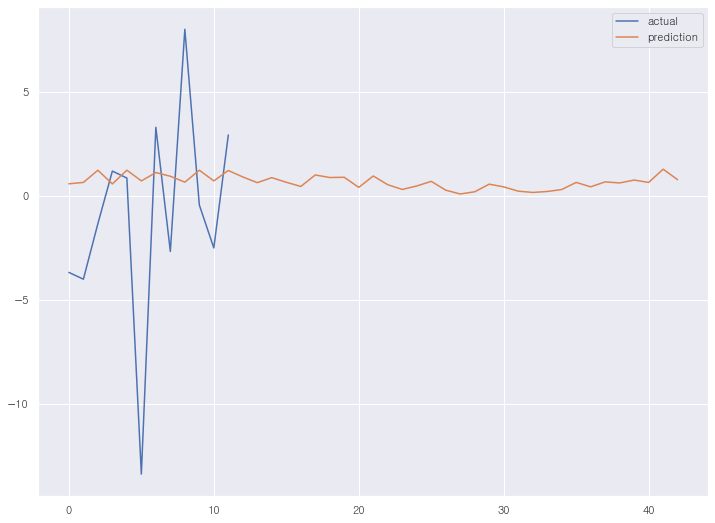

In [519]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [484]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [525]:
from sklearn.preprocessing import MinMaxScaler
# df_prac_1.drop(['날짜','Year','Month','Day'],axis=1,inplace=True)
df_prac_1

,외국인순매수,전월대비 등락률,2달,3달,5달
132,-29668,-2.511077,NaN,NaN,NaN
133,2651,0.240577,NaN,NaN,NaN
134,20323,4.131663,-1.135250,NaN,NaN
135,19570,-0.085174,2.186120,0.620388,NaN
136,1798,-0.539077,2.023245,1.429022,NaN
137,7893,-0.657964,-0.312126,1.169137,0.247383
138,33975,2.326489,-0.598520,-0.427405,0.618005
139,10792,0.915592,0.834262,0.376483,1.035187
140,10816,0.441353,1.621040,0.861372,0.391973
141,3986,-1.734172,0.678473,1.227811,0.497279


In [526]:
scaler=MinMaxScaler() ###stanrdardScaler객체 생성
scaler.fit(df_prac_1)#iris_df로 훈련을 시킨다. fit은 데이터 변환을 위해서 기준 정보를 설정하는 역할

data_scaled=scaler.transform(df_prac_1)  #transform()시 scale 변환된 데이터 셋이 numpy ndarray로 반환됨. 공식을 실행시켜준다고 생각하면됨.

data_scaled_df =pd.DataFrame(data=data_scaled,columns=['외국인순매수','전월대비 등락률','2달','3달','5달'])#데이터 프레임화



<AxesSubplot:>

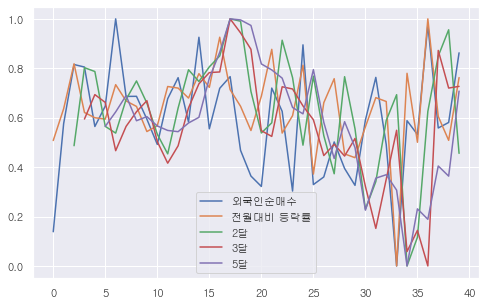

In [527]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
data_scaled_df.plot(figsize = (8,5))

##### 두 경우 모두 p-value가 시계열 데이터가 stationary라고 결론을 내릴 수 있다는 의미이다.

In [528]:
adfuller_test = adfuller(data_scaled_df['외국인순매수'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))


ADF test statistic: -5.835400841724418
p-value: 3.8871937209450733e-07


In [529]:
adfuller_test = adfuller(data_scaled_df['전월대비 등락률'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -7.140271026262664
p-value: 3.338202489652629e-10


In [530]:
forecasting_model = VAR(X_train)
results_aic = []
for p in range(1,10):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

LinAlgError: 4-th leading minor of the array is not positive definite

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

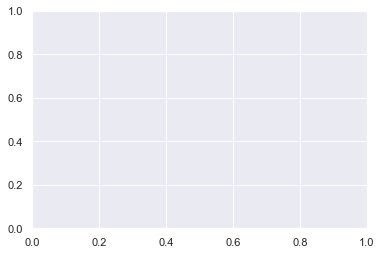

In [531]:
sns.set()
plt.plot(list(np.arange(1,10,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [532]:
results = forecasting_model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 02, May, 2022
Time:                     10:08:23
--------------------------------------------------------------------
No. of Equations:         35.0000    BIC:                   -97.2984
Nobs:                     164.000    HQIC:                  -125.201
Log likelihood:           6170.34    FPE:                1.87950e-62
AIC:                     -144.269    Det(Omega_mle):     1.76311e-76
--------------------------------------------------------------------
Results for equation 외국인순매수
                              coefficient            std. error           t-stat            prob
------------------------------------------------------------------------------------------------
const                    -28347610.812831                   NAN              NAN             NAN
L1.외국인순매수                        0.110598              0.175688            0.630           0

In [391]:
  
  mydata['외국인순매수']=mydata['외국인순매수'].astype('float64')
  mydata.dtypes

C:\Users\jangd\AppData\Local\Temp\ipykernel_6408\4047852726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['외국인순매수']=mydata['외국인순매수'].astype('float64')


외국인순매수      float64
전월대비 등락률    float64
dtype: object